# EDA of Dataset

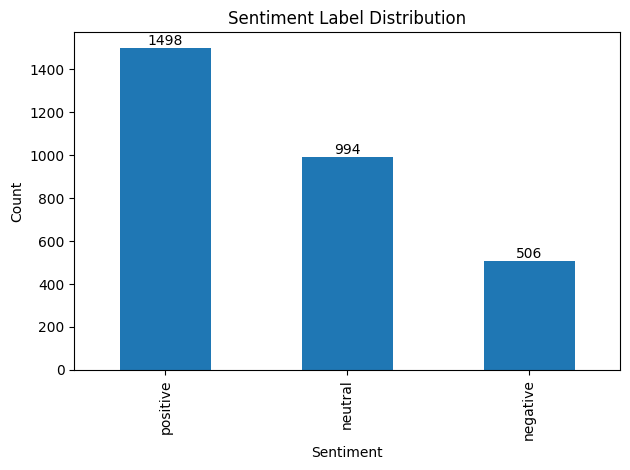

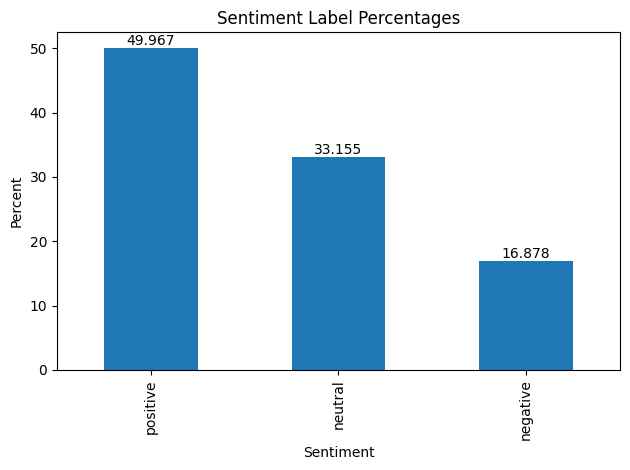

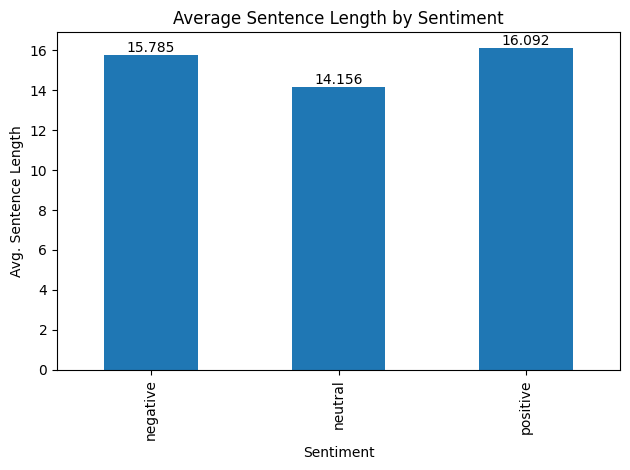

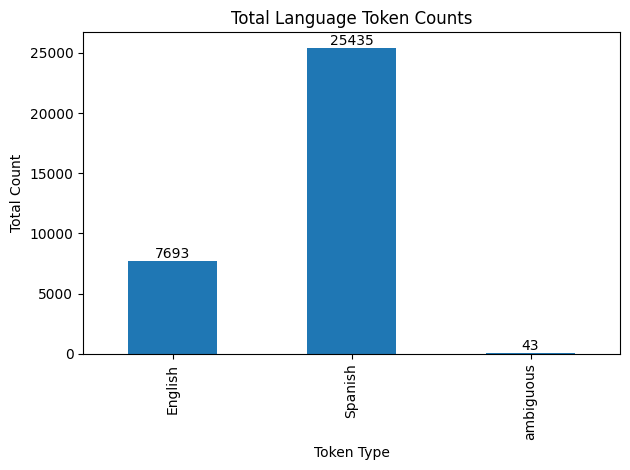

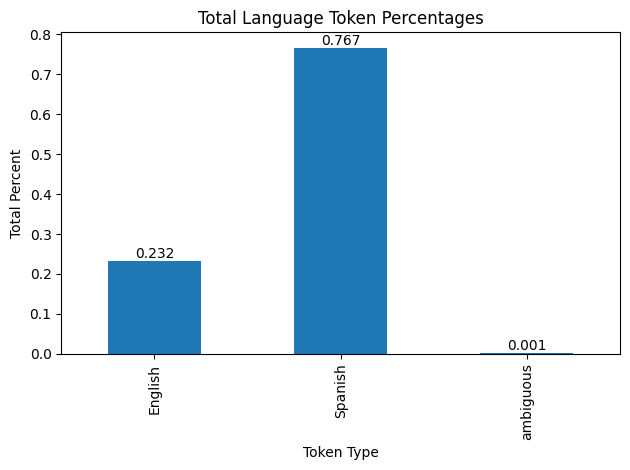

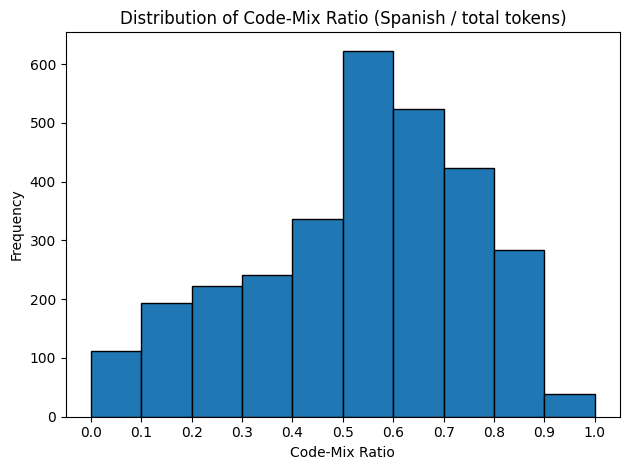

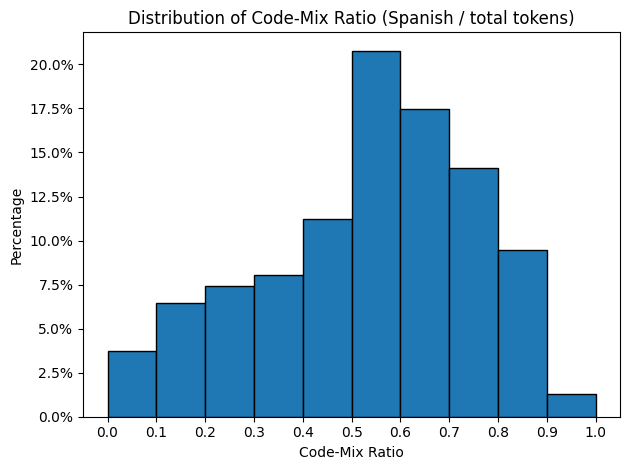

In [43]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

with open('spanglish_dataset.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df['Language Tokens'] = df['language'].str.split()
df['Sentence Length'] = df['sentence'].str.split().apply(len)
df['Num English Tokens'] = df['Language Tokens'].apply(lambda toks: toks.count('lang1'))
df['Num Spanish Tokens'] = df['Language Tokens'].apply(lambda toks: toks.count('lang2'))
df['Num Ambiguous Tokens'] = df['Language Tokens'].apply(lambda toks: toks.count('ambiguous'))
df['Code Mix Ratio'] = df['Num Spanish Tokens'] / df['Sentence Length']

# Utility function to add labels
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}' if isinstance(height, float) else f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

# Sentiment distribution counts
plt.figure()
ax = df['sentiment_label'].value_counts().plot(kind='bar')
add_labels(ax)
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Sentiment distribution percentages
plt.figure()
ax = df['sentiment_label'].value_counts(normalize=True).mul(100).plot(kind='bar')
add_labels(ax)
plt.title('Sentiment Label Percentages')
plt.xlabel('Sentiment')
plt.ylabel('Percent')
plt.tight_layout()
plt.show()

# Avg sentence length by sentiment
plt.figure()
ax = df.groupby('sentiment_label')['Sentence Length'].mean().plot(kind='bar')
add_labels(ax)
plt.title('Average Sentence Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Avg. Sentence Length')
plt.tight_layout()
plt.show()

# Total language token counts
lang_totals = pd.Series({
    'English':    df['Num English Tokens'].sum(),
    'Spanish':    df['Num Spanish Tokens'].sum(),
    'ambiguous':  df['Num Ambiguous Tokens'].sum()
})
plt.figure()
ax = lang_totals.plot(kind='bar')
add_labels(ax)
plt.title('Total Language Token Counts')
plt.xlabel('Token Type')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

# Total language token percentages
lang_totals /= lang_totals.sum()
plt.figure()
ax = lang_totals.plot(kind='bar')
add_labels(ax)
plt.title('Total Language Token Percentages')
plt.xlabel('Token Type')
plt.ylabel('Total Percent')
plt.tight_layout()
plt.show()

# Distribution of code-mix ratio
bin_edges = np.arange(0, 1.01, 0.1)  # Bin edges every 0.1
plt.figure()
plt.hist(
    df['Code Mix Ratio'],
    bins=bin_edges,
    edgecolor='black',
)
plt.title('Distribution of Code-Mix Ratio (Spanish / total tokens)')
plt.xlabel('Code-Mix Ratio')
plt.ylabel('Frequency')
plt.xticks(bin_edges)
plt.tight_layout()
plt.show()

# Distribution of code-mix ratio as percentages
plt.figure()
plt.hist(
    df['Code Mix Ratio'],
    bins=bin_edges,
    edgecolor='black',
    weights=[1 / len(df)] * len(df)
)
plt.title('Distribution of Code-Mix Ratio (Spanish / total tokens)')
plt.xlabel('Code-Mix Ratio')
plt.ylabel('Percentage')
plt.xticks(bin_edges)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.tight_layout()
plt.show()

